Copy zip over

In [108]:
%cd ..
!rm -r newData

/content


In [2]:
import json
import torch

resultTest = [json.loads(jline) for jline in open('/content/test.jsonl', 'r')]
print(len(resultTest))
resultTensor = torch.zeros(len(resultTest))
for i in range(len(resultTest)):
  resultTensor[i] = resultTest[i]['label']
print(resultTensor)

1000
tensor([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0.,

Using preprocessed

In [3]:
from google.colab import drive
drive.mount('/gdrive')
!ls '/gdrive/MyDrive/MemesDeepLearning'
!cp '/gdrive/MyDrive/MemesDeepLearning/tensorDataPreprocessed.zip' '/content/tensorData.zip'
!unzip -q tensorData.zip

Mounted at /gdrive
'4803 Project Proposal.gdoc'	     mmbt_model_best.zip
 CLIPBaselineipynb.ipynb	     MMBT_training.ipynb
 computed_data			     mmbt.zip
 computed_trainset.zip		    'MMF Tutorial.ipynb'
 computed_valset		     model_weights
 computed_valset.zip		     NeuralNetworkMeme.ipynb
'Copy of ToxicityAnalysis.ipynb'     preprocessed_data
'Data Efficiency.gdoc'		     pretrained_models_for_image_preprocessing
 dataFB.zip			     tensorDataPreprocessed.zip
 dev_all.jsonl			     tensorDataTestOnly.zip
'DialoGPT2 (Unimodal).ipynb'	     tensorData.zip
 final_model_submission.gsheet	     test.jsonl
'Generate Clean Meme Images.ipynb'   test_unseen.jsonl
'GPT (Unimodal).ipynb'		     ToxicityAnalysis.ipynb
 IterateMemes.ipynb		    'Untitled document.gdoc'
 mmbt_checkpoints.zip		    'VisualBERT + CLIP.ipynb'
 MMBT_inference.ipynb		     VisualGPT.ipynb


Using nonpreprocessed

In [73]:
from google.colab import drive
drive.mount('/gdrive')
!ls '/gdrive/MyDrive/MemesDeepLearning'
!cp '/gdrive/MyDrive/MemesDeepLearning/tensorData.zip' '/content/tensorData.zip'
!cp '/gdrive/MyDrive/MemesDeepLearning/tensorDataTestOnly.zip' '/content/tensorDataTestOnly.zip'
!unzip -q tensorData.zip
!unzip tensorDataTestOnly.zip

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'4803 Project Proposal.gdoc'	     mmbt_model_best.zip
 CLIPBaselineipynb.ipynb	     MMBT_training.ipynb
 computed_data			     mmbt.zip
 computed_trainset.zip		    'MMF Tutorial.ipynb'
 computed_valset		     model_weights
 computed_valset.zip		     NeuralNetworkMeme.ipynb
'Copy of ToxicityAnalysis.ipynb'     preprocessed_data
'Data Efficiency.gdoc'		     pretrained_models_for_image_preprocessing
 dataFB.zip			     tensorDataPreprocessed.zip
 dev_all.jsonl			     tensorDataTestOnly.zip
'DialoGPT2 (Unimodal).ipynb'	     tensorData.zip
 final_model_submission.gsheet	     test.jsonl
'Generate Clean Meme Images.ipynb'   test_unseen.jsonl
'GPT (Unimodal).ipynb'		     ToxicityAnalysis.ipynb
 IterateMemes.ipynb		    'Untitled document.gdoc'
 mmbt_checkpoints.zip		    'VisualBERT + CLIP.ipynb'
 MMBT_inference.ipynb		     VisualGPT.ipynb


Load Data

In [4]:
%cd newData

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F

trainDataGround = []
trainDataImg = []
trainDataText = []
testDataGround = []
testDataImg = []
testDataText = []

finalTestImg = []
finalTestText = []



for i in range(8):
    trainDataGround.append(torch.load(f'train_truth_{i}.pt'))
    trainDataImg.append(torch.load(f'train_img_{i}.pt'))
    trainDataText.append(torch.load(f'train_txt_{i}.pt'))
    testDataGround.append(torch.load(f'dev_truth_{i}.pt'))
    testDataImg.append(torch.load(f'dev_img_{i}.pt'))
    testDataText.append(torch.load(f'dev_txt_{i}.pt'))
    finalTestImg.append(torch.load(f'test1_img_{i}.pt'))
    finalTestText.append(torch.load(f'test1_txt_{i}.pt'))


train_ground = np.concatenate(trainDataGround)
train_img = torch.cat(trainDataImg)
train_text = torch.cat(trainDataText)

test_ground = np.concatenate(testDataGround)
test_img = torch.cat(testDataImg)
test_text = torch.cat(testDataText)

final_test_img = torch.cat(finalTestImg)
final_test_text = torch.cat(finalTestText)

train_ground = torch.from_numpy(train_ground)
#train_img = torch.from_numpy(train_img)
#train_text = torch.from_numpy(train_text)

test_ground = torch.from_numpy(test_ground)
#test_img = torch.from_numpy(test_img)
#test_text = torch.from_numpy(test_text)

train_data = torch.cat([train_img,train_text],dim=1)
test_data = torch.cat([test_img,test_text],dim=1)
final_test_data = torch.cat([final_test_img,final_test_text],dim=1)

/content/newData


In [5]:
batch_size = 32
train_data_batched = torch.split(train_data,batch_size)
train_ground_batched = torch.split(train_ground,batch_size)

print(train_data.shape)
print(test_data.shape)
print(final_test_data.shape)

torch.Size([8496, 1024])
torch.Size([496, 1024])
torch.Size([1000, 1024])


In [6]:
bestAccuracy = 0
bestModel = None

In [5]:
class MemeModel(nn.Module):
    """Some Information about MemeModel"""
    def __init__(self):
        super(MemeModel, self).__init__()
        innerSize = 32
        self.linear1 = nn.Linear(1024,innerSize)
        
        self.linear2 = nn.Linear(innerSize,innerSize)
        self.dropout = nn.Dropout(p=0.1)
        #self.batch1 = nn.BatchNorm1d(innerSize)
        self.linear3 = nn.Linear(innerSize,innerSize)
        #self.batch2 = nn.BatchNorm1d(innerSize)

        self.linear4 = nn.Linear(innerSize,2)
        #self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.linear1(x)
        #x = self.batch1(x)
        x = F.relu(x)
        x = self.dropout(x)
        oldX = x
        x = self.linear2(x)
        #x = self.batch1(x)
        x = F.relu(x)
        x = self.linear3(x)
        #x = self.batch2(x)

        x = x + oldX
        
        x = F.relu(x)
        x = self.linear4(x)

        #x = self.softmax(x)
        return x

In [6]:
class QuickModel(nn.Module):
  def __init__(self):
    super(QuickModel, self).__init__()
    self.dropout = nn.Dropout(p=0.5)
    self.linear1 = nn.Linear(1024,1024*(2**5))
    self.linear2 = nn.Linear(1024*(2**5),64)
    self.linear3 = nn.Linear(64,2)
  def forward(self, x):
    x = self.dropout(x)
    x = self.linear1(x)
    x = F.relu(x)
    x = self.linear2(x)
    x = F.relu(x)
    x = self.linear3(x)
    #x = F.sigmoid(x)
    #x = F.softmax(x,dim=1)
    #x = F.relu(x)
    return x

In [7]:
class QuickerModel(nn.Module):
  def __init__(self):
    super(QuickerModel, self).__init__()
    innerSize = 128
    self.numInner = 1
    self.linear1 = nn.Linear(1024,innerSize)
    self.linear = nn.ModuleList([nn.Linear(innerSize, innerSize) for i in range(self.numInner)])
    self.linear2 = nn.Linear(innerSize,2)


  def forward(self, x):
    x = self.linear1(x)
    x = F.relu(x)
    for module in self.linear:
      x = module(x)
      x = F.relu(x)
    x = self.linear2(x)
    return x


In [8]:
import random

class Shift(nn.Module):
  def __init__(self, shiftAmount):
    super(Shift, self).__init__()
    self.shiftAmount = shiftAmount
  def forward(self, x):
    torch.roll(x, random.randrange(-self.shiftAmount,self.shiftAmount,1)*self.training, dims=1)
    return x

In [9]:
class ShiftModel(nn.Module):
  def __init__(self):
    super(ShiftModel, self).__init__()
    self.linear1 = nn.Linear(1024,1024)
    #self.shift = Shift(0)
    self.linear2 = nn.Linear(1024,2)
  def forward(self, x):
    x = self.linear1(x)
    x = F.relu(x)
    #x = self.shift(x)
    x = self.linear2(x)
    #x = F.sigmoid(x)
    #x = F.softmax(x,dim=1)
    #x = F.relu(x)
    return x

In [7]:
import matplotlib.pyplot as plt
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#model = QuickModel()
model = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(1024,1024*2**5),
    nn.ReLU(),
    nn.Linear(1024*2**5,64),
    nn.ReLU(),
    nn.Linear(64,2)
)

EPOCHS = 200


model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
#optimizer = optim.AdamW(model.parameters(), lr=0.01)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

#scaler = torch.Tensor([0.75,1])


runLoss = []
runAcc = []
maxAccTemp = 0
for epoch in range(EPOCHS):
    running_loss = 0.0

    for i in range(len(train_data_batched)):
        
        inputs = train_data_batched[i].to(device)
        labels = train_ground_batched[i].type(torch.LongTensor).to(device)
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        #print(outputs.dtype)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()



        # print statistics
        running_loss += loss.item()
        howOften = len(train_data_batched)
        if i % howOften == howOften-1:
            _, predicted = torch.max(outputs.data, 1)
            numCorrect = (predicted == labels).sum().item()
            acc = (100.0 * numCorrect / labels.shape[0])
            #print(outputs)
            #print(labels)
            model.eval()
            with torch.no_grad():
                test_data = test_data.to(device)
                test_ground = test_ground.to(device)
                outputs = model(test_data)
                #print(test_data.shape)
                _, predicted = torch.max(outputs.data, 1)
                numCorrect = (predicted == test_ground).sum().item()
                acc2 = (100.0 * numCorrect / test_data.shape[0])
                runAcc.append(acc2)
                if acc2>maxAccTemp:
                  maxAccTemp = acc2
                if acc2>bestAccuracy:
                  print(f"This is BETTER than the old model which has {bestAccuracy}%")
                  bestAccuracy = acc2
                  bestModel = copy.deepcopy(model)
                #print('Accuracy of the network on the test data: %f %%' % acc2)
                print('[%d, %5d] loss: %.3f %.1f%% %.5f%%' %
                  (epoch + 1, i + 1, running_loss / howOften, acc, acc2))
                #print(f"Current best: {bestAccuracy} %")
            model.train()
            runLoss.append(running_loss / howOften)
            running_loss = 0.0
    #scheduler.step()
print(f'Finished Training with max acc {maxAccTemp}%')
print(model)
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(runLoss, color='black')
ax_right.plot(runAcc, color='red')

ax_left.set_ylabel("Loss", color='black')
ax_right.set_ylabel("Acc", color='red')
plt.xlabel("Epoch")
plt.show()

This is BETTER than the old model which has 0%
[1,   266] loss: 0.648 0.0% 50.20161%
[2,   266] loss: 0.659 0.0% 50.20161%


KeyboardInterrupt: ignored

Validation:

In [116]:

#model = bestModel
model.eval()
with torch.no_grad():
    test_data = test_data.to(device)
    test_ground = test_ground.to(device)
    outputs = model(test_data)
    print(test_data.shape)
    _, predicted = torch.max(outputs.data, 1)
    numCorrect = (predicted == test_ground).sum().item()
    acc = (100.0 * numCorrect / test_data.shape[0])
    if acc>bestAccuracy:
      print(f"This is BETTER than the old model which has {bestAccuracy}%")
      bestAccuracy = acc
      bestModel = model
    print('Accuracy of the network on the test data: %f %%' % acc)
    print(f"Current best: {bestAccuracy} %")
model.train()

torch.Size([496, 1024])
Accuracy of the network on the test data: 70.564516 %
Current best: 72.58064516129032 %


Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=1024, out_features=32768, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32768, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=2, bias=True)
)

Test_seen: Generate submissions

tensor([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

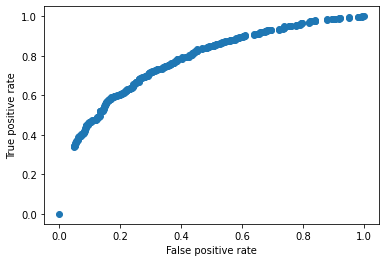

Accuracy: 71.1 AUROC: 0.22334933973589438
Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=1024, out_features=32768, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32768, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=2, bias=True)
)
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Batch size 32
# of epochs 200
Validation accuracy 50.20161290322581


In [18]:
import numpy as np
from sklearn import metrics
model# = bestModel
model.eval()
with torch.no_grad():
    final_test_data = final_test_data.to(device)
    outputs = model(final_test_data)
    outputs = F.softmax(outputs,dim=1)
    first, predicted = torch.max(outputs.data, 1)
    resultTensor = resultTensor.cpu()
    predicted = predicted.cpu()

    
    numCorrect = (predicted == resultTensor).sum().item()
    acc = (100.0 * numCorrect / resultTensor.shape[0])
    
    probs = outputs[:,1].cpu().numpy()
    print(predicted)
    fpr, tpr, thresholds = metrics.roc_curve(resultTensor, probs, pos_label=1)
    auroc = metrics.auc(tpr, fpr)
    plt.scatter(fpr,tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()
    print(f"Accuracy: {acc} AUROC: {auroc}")
    with open("/content/submission1.csv", "w") as f:
      f.write("proba,label\n")
      for i in range(predicted.shape[0]):
        f.write(f"{outputs[:,1][i]},{predicted[i]}\n")
model.train()
print(bestModel)
print(optimizer)
print(f"Batch size {batch_size}")
print(f"# of epochs {EPOCHS}")
print(f"Validation accuracy {bestAccuracy}")

In [94]:
torch.save(bestModel,'/content/bestModelWithoutPrepro.pt')

In [9]:
model = torch.load('/content/bestModel.pt')

In [58]:
print(newBestTest)

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=1024, out_features=32768, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32768, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=2, bias=True)
)


In [59]:
!ls -lh bestModel.pt

-rw-r--r-- 1 root root 137M May  2 00:07 bestModel.pt


In [67]:
EPOCHS = 1500